In [92]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Experiment #1

In [171]:
dataset1 = pd.read_csv('Dataset/Experiment1/Experiment 1 Dataset.csv')
dataset1.head()

,Unnamed: 0,Key,Cipher Text,I.C,Entropy,Chi-Squared,English HMM Score,Label
0,0,owcnyfltbxiumzkjeqarvdghsp,rtyfvurkzckvzrslqoznxvqsaobnfqbnosozbzdyarblor...,0.065243,4.170784,14007.633040,-1.842987,0
1,1,zubwflpjiankvhrgecqostdymx,ojflskorhbrshompczhwascmqziwlciwzmzhihtfqoipzo...,0.065243,4.170784,12903.394793,-1.807500,0
2,2,qwfhrcgxtjolvibzsdunpkemya,nxrcplnbifbpinygdqihjpdyuqthcdthqyqitikruntgqn...,0.065243,4.170784,9101.369985,-1.727090,0
3,3,hopgnlejzatsxkvrqdwbymuifc,bjnlysbvkpvykbfedhkgaydfwhzgldzghfhkzkmnwbzehb...,0.065243,4.170784,10537.984371,-1.884183,0
4,4,fpsctnxdwoybqhivujmrglzeka,rdtngbrihsighrkxjfhcogjkmfwcnjwcfkfhwhltmrwxfr...,0.065243,4.170784,5134.394047,-1.686552,0


In [241]:
x = dataset1.iloc[:, [4, 5]].values

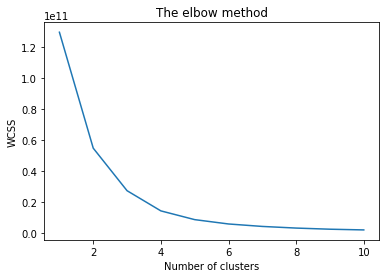

In [242]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [243]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

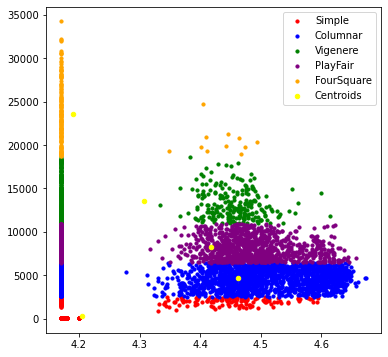

In [244]:
plt.figure(figsize = (6, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Simple')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Columnar')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Vigenere')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 10, c = 'purple', label = 'PlayFair')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 10, c = 'orange', label = 'FourSquare')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 20, c = 'yellow', label = 'Centroids')

plt.legend()

In [245]:
ss = silhouette_score(x, KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit_predict(x))

print(ss)

0.6100660442585004


# Experiment #2

In [127]:
dataset2 = pd.read_csv('Dataset/Experiment2/Experiment 2 Dataset.csv')
dataset2.head()

,Unnamed: 0,Key,Cipher Text,I.C,Entropy,Chi-Squared,English HMM Score,Cipher HMM Score,Label
0,0,phqgiumeaylnofdxjkrcvstzwb,liwopfcniceararpfarrviteaqehdanrgdtfcdpopccikd...,0.065859,3.999028,220.474383,-1.554382,-1.203193,0
1,1,phqgiumeaylnofdxjkrcvstzwb,qcasipfpnwrarduceifitifmnarehahniaqikcpafnwedx...,0.068889,3.946497,165.382116,-1.485396,-1.216894,0
2,2,phqgiumeaylnofdxjkrcvstzwb,wceiiziqvcasiriqkicpkwduceimdnuprrdqapcadfydif...,0.059798,4.138949,287.423299,-1.585592,-1.225738,0
3,3,phqgiumeaylnofdxjkrcvstzwb,dfpnpakxdkcceicekiixpwpodfceudkudvkkddorlacqei...,0.072727,3.929933,304.276479,-1.539980,-1.242152,0
4,4,phqgiumeaylnofdxjkrcvstzwb,kokliinikkixdkcrckpqcdkxkdgvqcadfpcoprriwuikmv...,0.066869,3.965010,352.285654,-1.644785,-1.377248,0


In [271]:
x2 = dataset2.iloc[:, [3, 4, 7]].values
y2 = dataset2['Label'].values

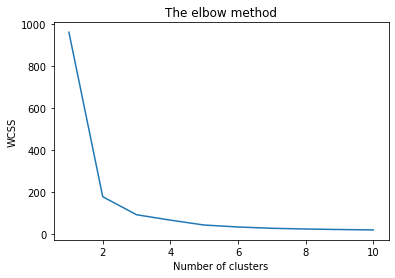

In [272]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [273]:
kmeans2 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(x2)

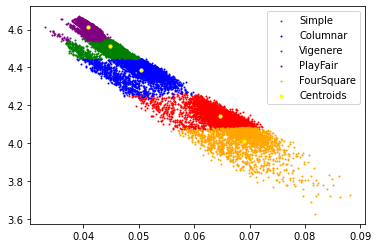

In [274]:
plt.scatter(x2[y_kmeans2 == 0, 0], x2[y_kmeans2 == 0, 1], s = 1, c = 'red', label = 'Simple')
plt.scatter(x2[y_kmeans2 == 1, 0], x2[y_kmeans2 == 1, 1], s = 1, c = 'blue', label = 'Columnar')
plt.scatter(x2[y_kmeans2 == 2, 0], x2[y_kmeans2 == 2, 1], s = 1, c = 'green', label = 'Vigenere')
plt.scatter(x2[y_kmeans2 == 3, 0], x2[y_kmeans2 == 3, 1], s = 1, c = 'purple', label = 'PlayFair')
plt.scatter(x2[y_kmeans2 == 4, 0], x2[y_kmeans2 == 4, 1], s = 1, c = 'orange', label = 'FourSquare')

#Plotting the centroids of the clusters
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:,1], s = 10, c = 'yellow', label = 'Centroids')

plt.legend()

In [275]:
ss = silhouette_score(x2, KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit_predict(x2))

print(ss)

0.5589469212832673
